# WEEKLY PERFORMANCE 

in this notebook we will focus on my weekly performance. i will do monitoring my performance weekly and put it in power point and post it in linkedin once a month. there will be metrics that we will observe. 

## Metric 

1. MAF HR Consistency 
    - Target : pace up, HR down / pace up HR stable.

2. % MAF clean or % pure MAF runs
    - Target : increace distance/instensisty or >= 60-70%

3. Longrun HR Drift 
    - Target : see HR drift at longruns <= 5 bpm.

## Graphics 

there will be only 1 graph, it will be a weekly MAF pace trends which is the one in the baseline performance analysis notebook.
why? 

1. easy to compare.
2. its a visual of "is the run gettng easier or not yet"
3. no weekly noise.

so there will be : 
- 3 metrics : signals.
- 1 graph : story. 




In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
from pathlib import Path

In [12]:
runs = pd.read_csv("../data/processed/runs_labeledv2.csv")

runs["Activity Date"] = pd.to_datetime(runs["Activity Date"])
runs = runs.sort_values("Activity Date")

print("Total runs:", len(runs))


Total runs: 82


## 1. Determine Last full week (ISO safe)

In [13]:

current_week = runs["Activity Date"].dt.to_period("W").max()
last_full_week = current_week # - 1 (uncomment to get last full week instead of current week)


runs["week"] = runs["Activity Date"].dt.to_period("W")

last_week = runs[runs["week"] == last_full_week].copy()

print("Week analyzed:", last_full_week)
print("Runs this week:", len(last_week))




Week analyzed: 2026-01-12/2026-01-18
Runs this week: 4


# Core Weekly Performance Metrics

## 1. MAF HR Consistency (STD)

In [14]:
maf_clean = last_week[last_week["maf_band"] == "maf_clean"]

maf_hr_std = maf_clean["Average Heart Rate"].std()

print("MAF HR STD:", round(maf_hr_std, 2))


MAF HR STD: 0.71


## 2. MAF clean Percentage

In [15]:
maf_clean_pct = (
    last_week["maf_band"]
    .value_counts(normalize=True)
    .get("maf_clean", 0) * 100
)

print("MAF Clean %:", round(maf_clean_pct, 1))


MAF Clean %: 50.0


## 3. Long run HR Drft

In [16]:
# for now the longrun is defined as the longest run in the last week

long_run = last_week.sort_values("Moving Time", ascending=False).head(1)

baseline_hr = maf_clean["Average Heart Rate"].mean()

hr_drift = long_run["Average Heart Rate"].values[0] - baseline_hr

print("Long run HR drift:", round(hr_drift, 1), "bpm")



Long run HR drift: 5.5 bpm


## 4. Weekly MAF Pace Trend (Mean + Median)

In [17]:
weekly_pace = (
    runs[runs["maf_band"] == "maf_clean"]
    .set_index("Activity Date")
    .resample("W")["pace_min_per_km"]
    .agg(["mean", "median"])
)

In [18]:
today = datetime.today()

year = today.year
month_name = calendar.month_name[today.month]
week_number = today.isocalendar().week

report_name = f"{month_name}_week_{week_number}_{year}"

report_dir = Path(f"../reports/{year}/{month_name}")
report_dir.mkdir(parents=True, exist_ok=True)

print("Report name:", report_name)


Report name: January_week_4_2026


In [19]:

runs["Activity Date"] = pd.to_datetime(runs["Activity Date"])

runs["week"] = runs["Activity Date"].dt.to_period("W")

analysis_week = runs["week"].max()
weekly_data = runs[runs["week"] == analysis_week].copy()

print("Week analyzed:", analysis_week)
print("Runs this week:", len(weekly_data))


week_start = analysis_week.start_time

year = week_start.year
month_name = calendar.month_name[week_start.month]
week_number = week_start.isocalendar().week
report_name = f"{month_name}_week_{week_number}_{year}"

report_dir = Path(f"../reports/{year}/{month_name}")
report_dir.mkdir(parents=True, exist_ok=True)

print("Report name:", report_name)
print("Report directory:", report_dir)

Week analyzed: 2026-01-12/2026-01-18
Runs this week: 4
Report name: January_week_3_2026
Report directory: ..\reports\2026\January


### Graphichs

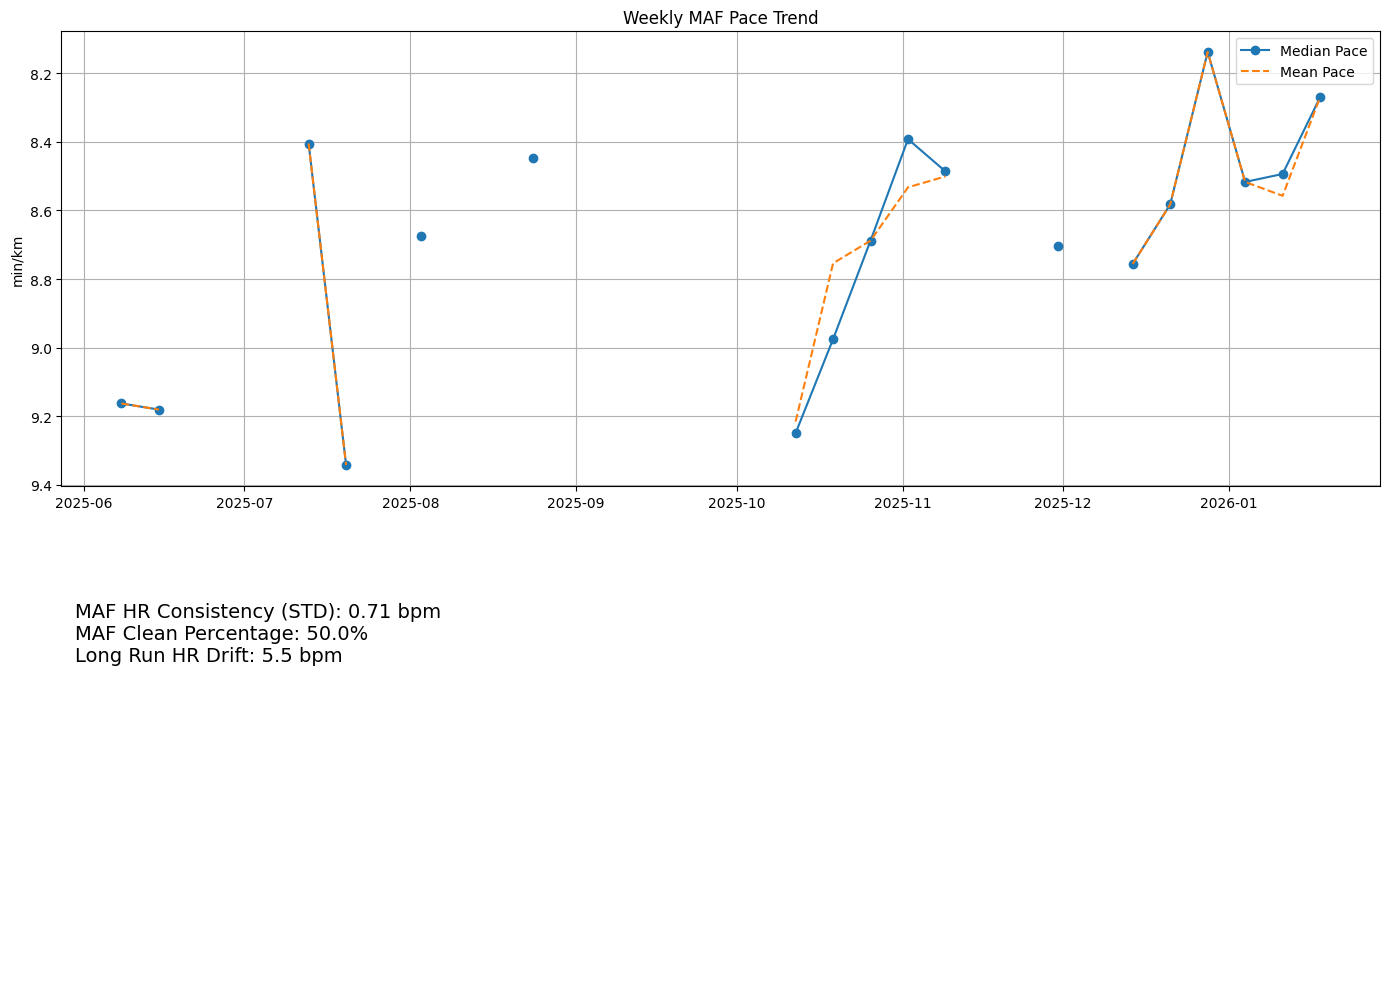

In [20]:
plt.figure(figsize=(14, 10))

# --- Plot 1: Weekly MAF Pace Trend ---
plt.subplot(2, 1, 1)
plt.plot(
    weekly_pace.index,
    weekly_pace["median"],
    marker="o",
    label="Median Pace"
)
plt.plot(
    weekly_pace.index,
    weekly_pace["mean"],
    linestyle="--",
    label="Mean Pace"
)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.title("Weekly MAF Pace Trend")
plt.ylabel("min/km")

# --- Plot 2: Weekly Key Metrics ---
plt.subplot(2, 1, 2)
plt.axis("off")

metrics_text = (
    f"MAF HR Consistency (STD): {maf_hr_std:.2f} bpm\n"
    f"MAF Clean Percentage: {maf_clean_pct:.1f}%\n"
    f"Long Run HR Drift: {hr_drift:.1f} bpm"
)

plt.text(
    0.01, 0.7,
    metrics_text,
    fontsize=14
)

plt.tight_layout()
